In [1]:
import pandas as pd
from datetime import datetime
time_stamp=pd.Timestamp(datetime(2021,1,1))
time_stamp

Timestamp('2021-01-01 00:00:00')

In [2]:
print(time_stamp.year)
print(time_stamp.month)
print(time_stamp.quarter)
print(time_stamp.dayofweek)
print(time_stamp.dayofyear)
print(time_stamp.weekofyear)

2021
1
1
4
1
53


In [3]:
index=pd.date_range(start='2021-01-01', periods=12, freq='M')

In [4]:
index

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [5]:
index.to_period()

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]', freq='M')

# Creating Time-Series

In [6]:
pd.DataFrame({'data':index})

,data
0,2021-01-31
1,2021-02-28
2,2021-03-31
3,2021-04-30
4,2021-05-31
5,2021-06-30
6,2021-07-31
7,2021-08-31
8,2021-09-30
9,2021-10-31


In [7]:
import numpy as np
import random
data=np.random.random(12)

In [8]:
pd.DataFrame(data=data, index=index)

,0
2021-01-31,0.415479
2021-02-28,0.816372
2021-03-31,0.721883
2021-04-30,0.417794
2021-05-31,0.271053
2021-06-30,0.672171
2021-07-31,0.622913
2021-08-31,0.754620
2021-09-30,0.040854
2021-10-31,0.586825


In [9]:
seven_days = pd.date_range(start='2017-01-01', periods=7)
seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday)

6 <built-in method weekday of Timestamp object at 0x0000020277B44510>
0 <built-in method weekday of Timestamp object at 0x0000020277B44F20>
1 <built-in method weekday of Timestamp object at 0x0000020277B44040>
2 <built-in method weekday of Timestamp object at 0x0000020277B44890>
3 <built-in method weekday of Timestamp object at 0x0000020277B8E3C0>
4 <built-in method weekday of Timestamp object at 0x0000020277B8E2E0>
5 <built-in method weekday of Timestamp object at 0x0000020277B8E350>


In [11]:
import datetime as dt
df=pd.DataFrame({'data':data, 'index':index})
df['weekday']=df['index'].dt.day_name()
df.set_index('index', inplace=True)
df

,data,weekday
index,,
2021-01-31,0.415479,Sunday
2021-02-28,0.816372,Sunday
2021-03-31,0.721883,Wednesday
2021-04-30,0.417794,Friday
2021-05-31,0.271053,Monday
2021-06-30,0.672171,Wednesday
2021-07-31,0.622913,Saturday
2021-08-31,0.754620,Tuesday
2021-09-30,0.040854,Thursday


In [12]:
ggl=pd.read_csv('google.csv')
ggl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [13]:
ggl['Date']=pd.to_datetime(ggl['Date'])
ggl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [14]:
ggl['weekday']=ggl['Date'].dt.day_name()
ggl.set_index('Date', inplace=True)
ggl.head()

,Close,weekday
Date,,
2014-01-02,556.00,Thursday
2014-01-03,551.95,Friday
2014-01-04,NaN,Saturday
2014-01-05,NaN,Sunday
2014-01-06,558.10,Monday


# Plotting stock prices

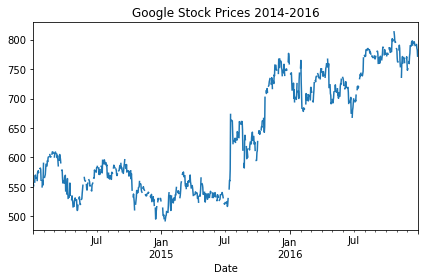

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)

ggl.Close.plot(title='Google Stock Prices 2014-2016')
plt.tight_layout();plt.show()

In [16]:
ggl.loc['2015']

,Close,weekday
Date,,
2015-01-01,NaN,Thursday
2015-01-02,524.81,Friday
2015-01-03,NaN,Saturday
2015-01-04,NaN,Sunday
2015-01-05,513.87,Monday
...,...,...
2015-12-27,NaN,Sunday
2015-12-28,762.51,Monday
2015-12-29,776.60,Tuesday


In [17]:
ggl.loc['2014']

,Close,weekday
Date,,
2014-01-02,556.00,Thursday
2014-01-03,551.95,Friday
2014-01-04,NaN,Saturday
2014-01-05,NaN,Sunday
2014-01-06,558.10,Monday
...,...,...
2014-12-27,NaN,Saturday
2014-12-28,NaN,Sunday
2014-12-29,530.33,Monday


In [18]:
ggl.loc['2014-3':'2015-4']

,Close,weekday
Date,,
2014-03-01,NaN,Saturday
2014-03-02,NaN,Sunday
2014-03-03,600.74,Monday
2014-03-04,606.85,Tuesday
2014-03-05,608.52,Wednesday
...,...,...
2015-04-26,NaN,Sunday
2015-04-27,555.37,Monday
2015-04-28,553.68,Tuesday


In [19]:
ggl.loc['2015-04-30','Close']

537.34

In [20]:
ggl.loc['2015-1':'2016-12', 'Close']

Date
2015-01-01       NaN
2015-01-02    524.81
2015-01-03       NaN
2015-01-04       NaN
2015-01-05    513.87
               ...  
2016-12-26       NaN
2016-12-27    791.55
2016-12-28    785.05
2016-12-29    782.79
2016-12-30    771.82
Name: Close, Length: 730, dtype: float64

In [21]:
ggl.loc['2015-1':'2016-12']

,Close,weekday
Date,,
2015-01-01,NaN,Thursday
2015-01-02,524.81,Friday
2015-01-03,NaN,Saturday
2015-01-04,NaN,Sunday
2015-01-05,513.87,Monday
...,...,...
2016-12-26,NaN,Monday
2016-12-27,791.55,Tuesday
2016-12-28,785.05,Wednesday


### Comparing Annual Google Stock Prices

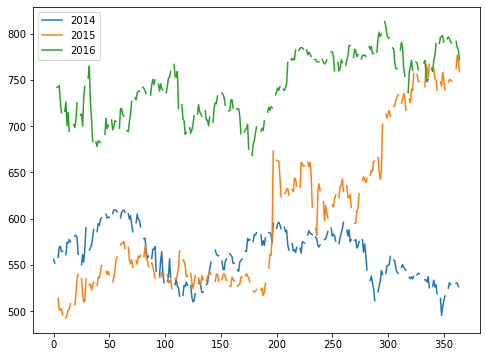

In [22]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2014', '2015', '2016']:
    price_per_year = ggl.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
plt.rcParams["figure.figsize"] = (8,6)

prices.plot()
plt.show()

#### Business day frequency

In [23]:
# 2015-2016 stock prices
ggl=ggl.loc['2015-1':'2016-12']
ggl

,Close,weekday
Date,,
2015-01-01,NaN,Thursday
2015-01-02,524.81,Friday
2015-01-03,NaN,Saturday
2015-01-04,NaN,Sunday
2015-01-05,513.87,Monday
...,...,...
2016-12-26,NaN,Monday
2016-12-27,791.55,Tuesday
2016-12-28,785.05,Wednesday


In [24]:
ggl.asfreq('B').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2015-01-01 to 2016-12-30
Freq: B
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    504 non-null    float64
 1   weekday  522 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


#### Which days are missing?

In [25]:
ggl[ggl.Close.isnull()].weekday.value_counts()

Saturday    104
Sunday      104
Monday       10
Friday        5
Thursday      3
Name: weekday, dtype: int64

### NYC Ozone Quality Data

In [26]:
nyc=pd.read_csv('nyc.csv')
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


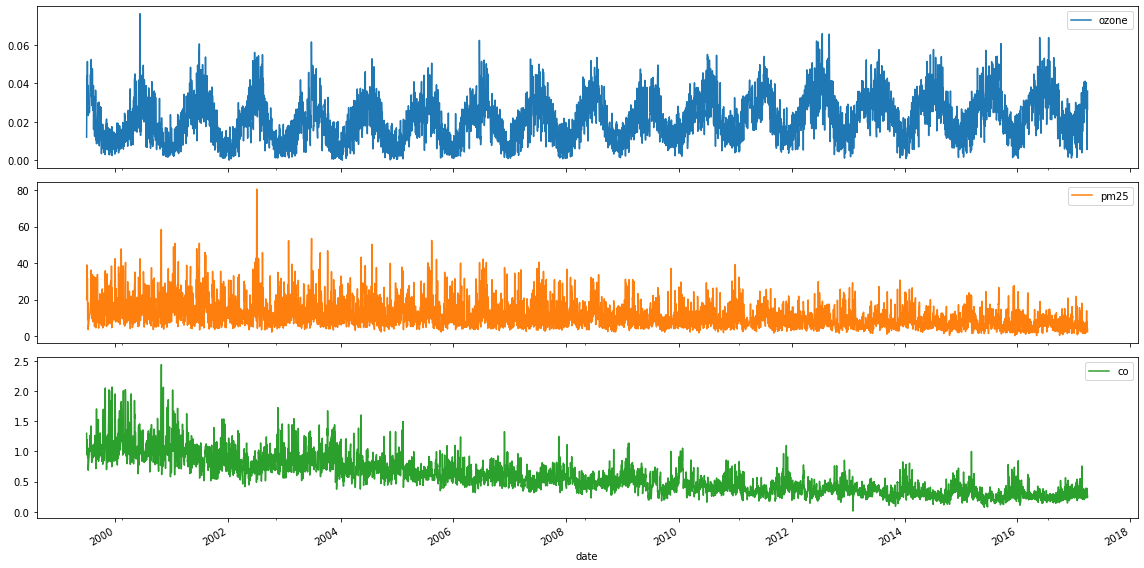

In [27]:
plt.rcParams["figure.figsize"] = (16,8)
nyc['date']=pd.to_datetime(nyc.date)
nyc.set_index('date', inplace=True)
nyc.plot(subplots=True)
plt.tight_layout();plt.show()

### Carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

In [28]:
co=pd.read_csv('co_cities.csv')
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [29]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB


In [30]:
# Set datetime index
co['date']=pd.to_datetime(co.date)
co.set_index('date', inplace=True)

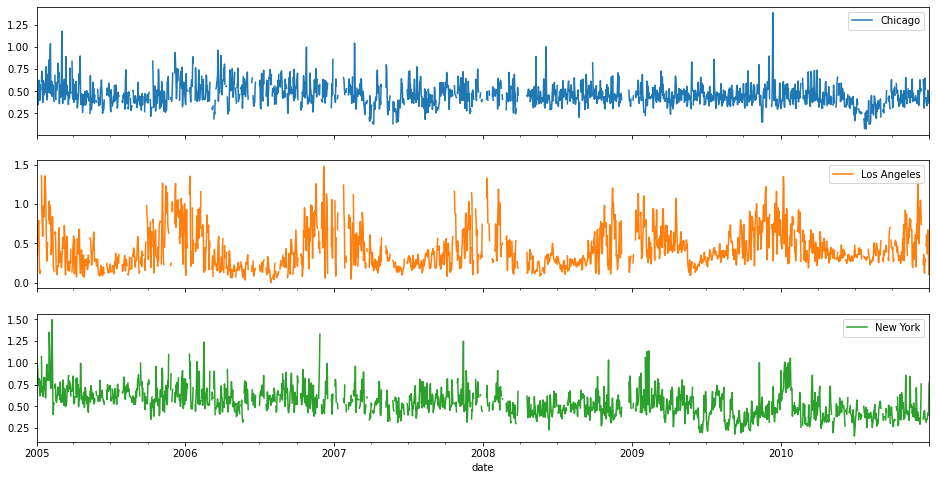

In [31]:
plt.rcParams["figure.figsize"] = (16,8)

# Set the frequency to calendar daily
co_daily = co.asfreq('D')

# Plot the data
co_daily.plot(subplots=True)
plt.show()

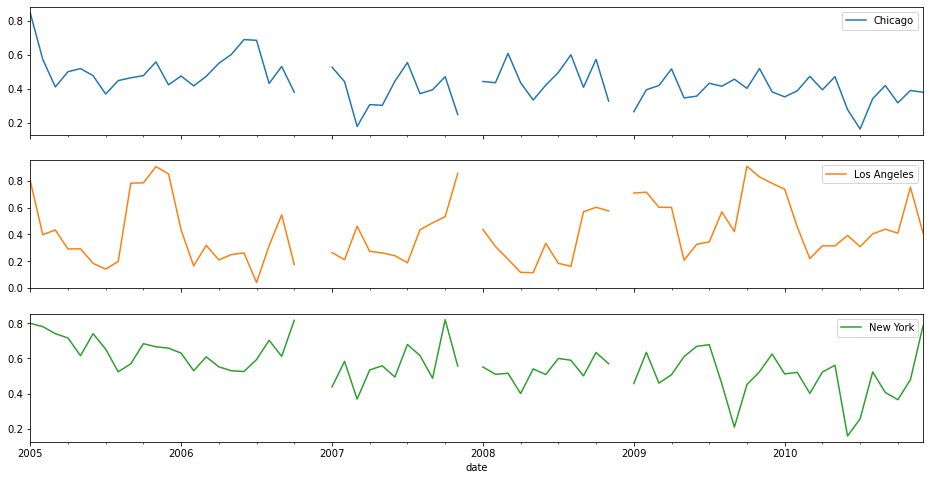

In [32]:
plt.rcParams["figure.figsize"] = (16,8)

# Set frequency to monthly
co_monthly = co.asfreq('M')

# Plot the data
co_monthly.plot(subplots=True)
plt.show()

# Lags, changes, and returns for stock price series

In [33]:
google=pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


#### Moving data betweek past & future
- .shift() Method
   -   defaults to periods=1
   -   1 period into future

In [34]:
google=google.asfreq('B')
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [35]:
google.tail()

,Close
Date,
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05
2016-12-29,782.79
2016-12-30,771.82


In [36]:
google['shifted']=google.Close.shift()
google.tail()

,Close,shifted
Date,,
2016-12-26,NaN,789.91
2016-12-27,791.55,NaN
2016-12-28,785.05,791.55
2016-12-29,782.79,785.05
2016-12-30,771.82,782.79


In [37]:
# 1 period into past
google['lagged']=google.Close.shift(periods=-1)
google.tail()

,Close,shifted,lagged
Date,,,
2016-12-26,NaN,789.91,791.55
2016-12-27,791.55,NaN,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


#### Calculate one period percent change

In [38]:
google['change']=google.Close.div(google.shifted)

In [39]:
# Calculate relative percent change as return
google['return']=google.change.sub(1).mul(100)
google.tail(10)

,Close,shifted,lagged,change,return
Date,,,,,
2016-12-19,794.20,790.80,796.42,1.004299,0.429944
2016-12-20,796.42,794.20,794.56,1.002795,0.279527
2016-12-21,794.56,796.42,791.26,0.997665,-0.233545
2016-12-22,791.26,794.56,789.91,0.995847,-0.415324
2016-12-23,789.91,791.26,NaN,0.998294,-0.170614
2016-12-26,NaN,789.91,791.55,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174
2016-12-29,782.79,785.05,771.82,0.997121,-0.287880


In [40]:
google['diff']=google.Close.diff()
google.tail()

,Close,shifted,lagged,change,return,diff
Date,,,,,,
2016-12-26,NaN,789.91,791.55,NaN,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50
2016-12-29,782.79,785.05,771.82,0.997121,-0.287880,-2.26
2016-12-30,771.82,782.79,NaN,0.985986,-1.401398,-10.97


In [41]:
google['pct_change']=google.Close.pct_change().mul(100)
google.tail()

,Close,shifted,lagged,change,return,diff,pct_change
Date,,,,,,,
2016-12-26,NaN,789.91,791.55,NaN,NaN,NaN,0.000000
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN,0.207619
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50,-0.821174
2016-12-29,782.79,785.05,771.82,0.997121,-0.287880,-2.26,-0.287880
2016-12-30,771.82,782.79,NaN,0.985986,-1.401398,-10.97,-1.401398


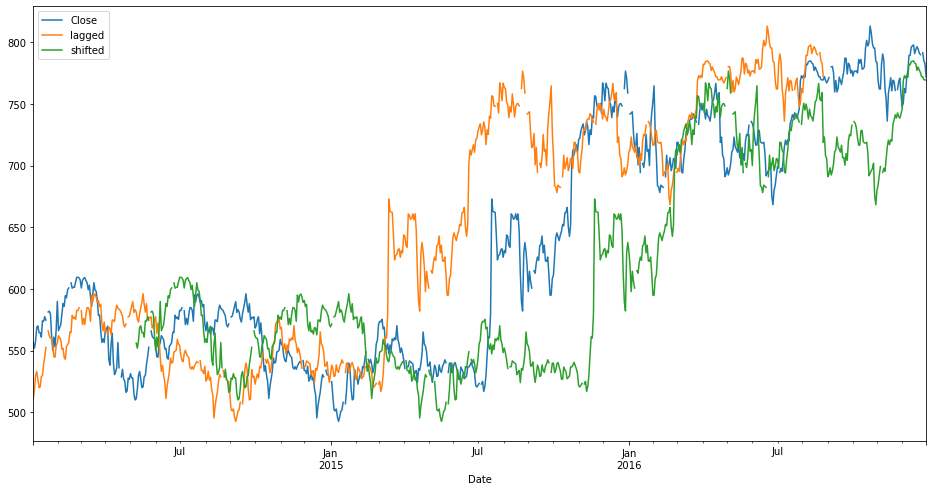

In [42]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()


In [43]:
google.shifted[google.shifted.notnull()]

Date
2014-05-08    556.00
2014-05-09    551.95
2014-05-12    558.10
2014-05-13    568.86
2014-05-14    570.04
               ...  
2016-12-26    772.15
2016-12-27    772.08
2016-12-28    769.64
2016-12-29    769.41
2016-12-30    769.54
Name: shifted, Length: 669, dtype: float64

In [44]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    756 non-null    float64
 1   lagged   669 non-null    float64
 2   shifted  669 non-null    float64
dtypes: float64(3)
memory usage: 24.4 KB


# Stock price changes

In [45]:
yahoo=pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [46]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


## Plotting multi-period returns

#### Yahoo:

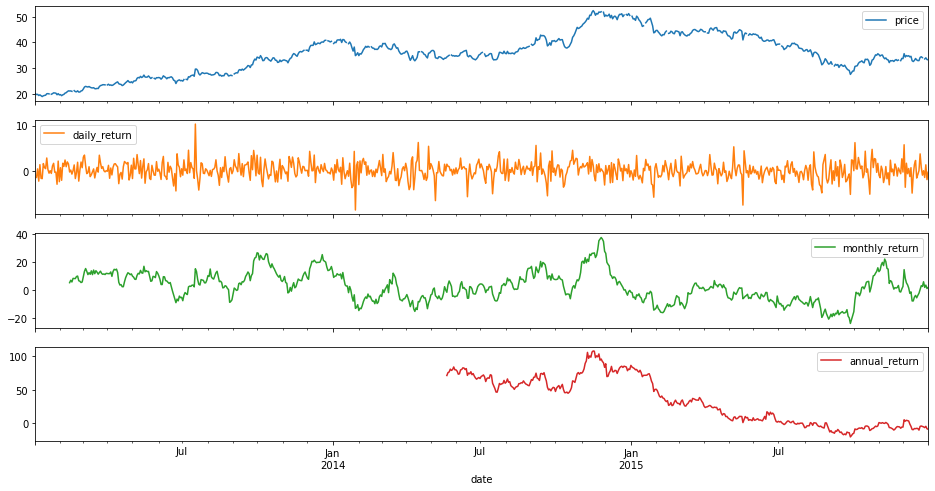

In [47]:
yahoo=pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')
# Create daily_return
yahoo['daily_return'] = yahoo.price.pct_change(1).mul(100)

# Create monthly_return
yahoo['monthly_return'] = yahoo.price.pct_change(30).mul(100)

# Create annual_return
yahoo['annual_return'] = yahoo.price.pct_change(360).mul(100)

# Plot the result

yahoo.plot(subplots=True)
plt.show()

#### Google

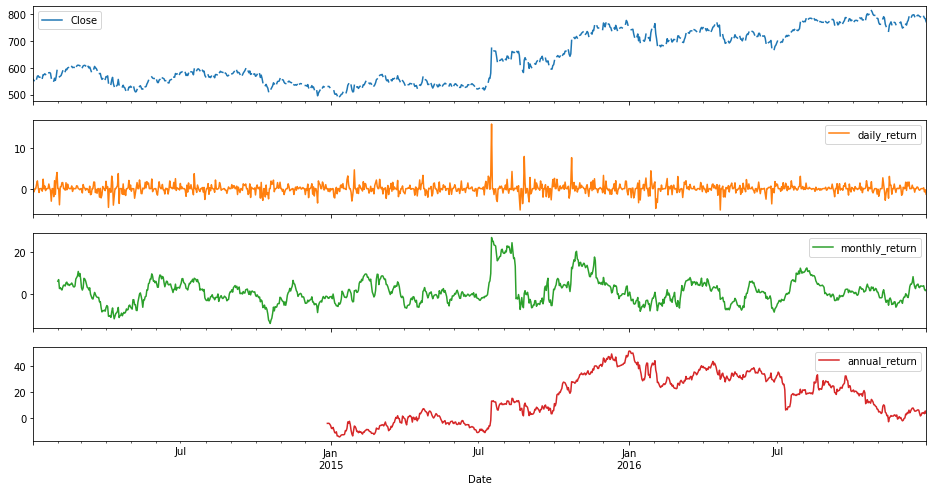

In [48]:
google=pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result

google.plot(subplots=True)
plt.show()

# Compare time series growth rate

In [49]:
google=pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
first_price=google.Close.iloc[0]
normalized=google.Close.div(first_price).mul(100)

In [50]:
first_price

556.0

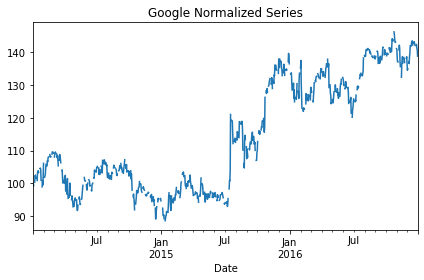

In [51]:
plt.rcParams["figure.figsize"] = (6,4)
normalized.plot(title='Google Normalized Series')
plt.tight_layout();plt.show()


# Multiple stock prices

In [52]:
df=pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')
first_prices=df.iloc[0]
normalized_stocks=df.div(first_prices).mul(100)
normalized_stocks

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.196271,99.133749,100.589993,100.000000,99.629172,101.767969,99.345336,99.727414,101.111111,101.552740,99.929947,100.171880
2010-01-06,98.593392,98.388773,98.767737,99.560440,99.917594,100.681766,105.466448,99.532710,101.074074,104.658219,98.879159,99.432795
2010-01-07,98.397121,97.487872,97.087379,98.901099,101.194891,102.651953,107.266776,98.870717,99.851852,104.676066,97.197898,98.676521
2010-01-08,99.051358,98.354123,99.716206,99.340659,101.606922,100.710654,108.510638,98.909657,100.185185,105.836159,96.567426,103.420419
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,381.157998,255.630631,568.028379,305.274725,322.950144,139.224636,421.440262,407.749221,123.740741,68.034981,32.119089,199.329667
2016-12-27,383.578672,257.033957,576.101568,307.692308,322.332097,139.565519,422.062193,408.099688,124.037037,68.445476,31.978984,199.604675
2016-12-28,381.943081,255.838531,576.646751,305.274725,318.170581,139.039750,418.756137,403.738318,122.407407,69.373550,31.628722,198.006188


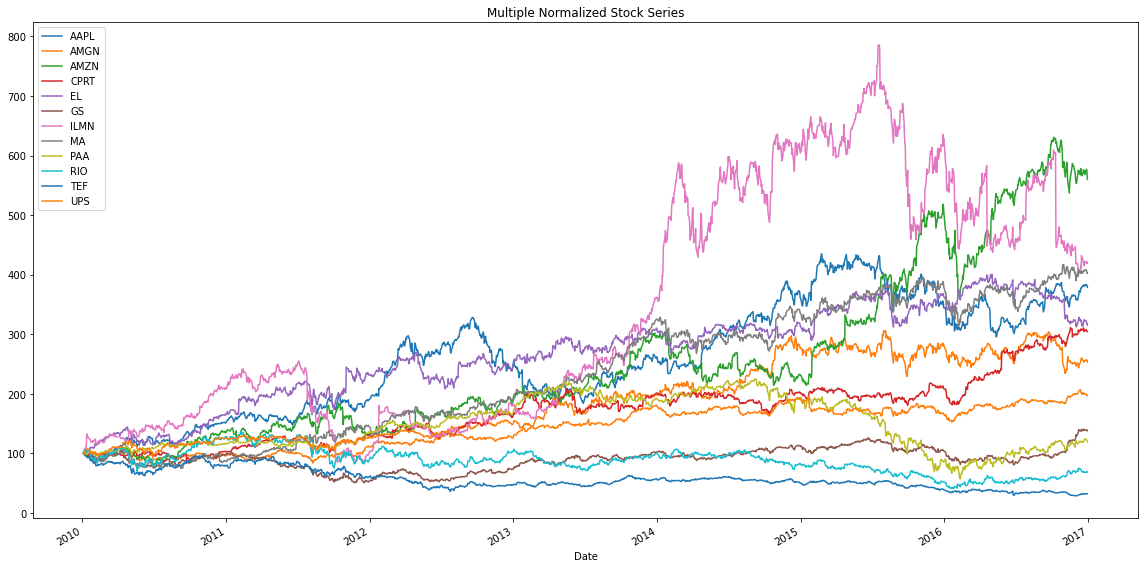

In [53]:
plt.rcParams["figure.figsize"] = (16,8)

normalized_stocks.plot(title='Multiple Normalized Stock Series')
plt.tight_layout();plt.show()

# Compare the performance of several asset classes
We'll compare four key assets; sp500, gold, oil and bonds  prices across 10 years.

In [54]:
prices=pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
prices.tail()

,SP500,Bonds,Gold,Oil
DATE,,,,
2017-06-20,2437.03,621.84,1246.50,43.34
2017-06-21,2435.61,622.94,1247.05,42.48
2017-06-22,2434.50,622.93,1251.40,42.53
2017-06-23,2438.30,623.57,1256.30,42.86
2017-06-26,2439.07,625.00,1240.85,43.24


In [55]:
normalized=prices.div(prices.iloc[0])*100
normalized.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


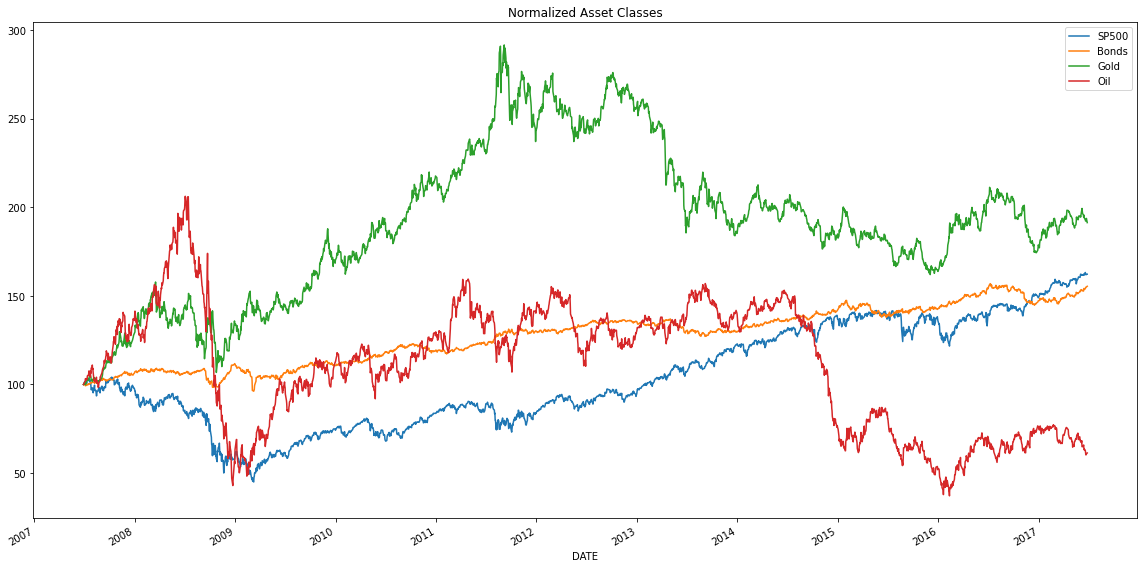

In [56]:
plt.rcParams["figure.figsize"] = (16,8)

normalized.plot(title='Normalized Asset Classes')
plt.tight_layout();plt.show()

# Plot performance difference vs benchmark index
Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [57]:
msft_aapl=pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')
msft_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2007-01-03 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
dtypes: float64(2)
memory usage: 59.0 KB


In [58]:
sp500=pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


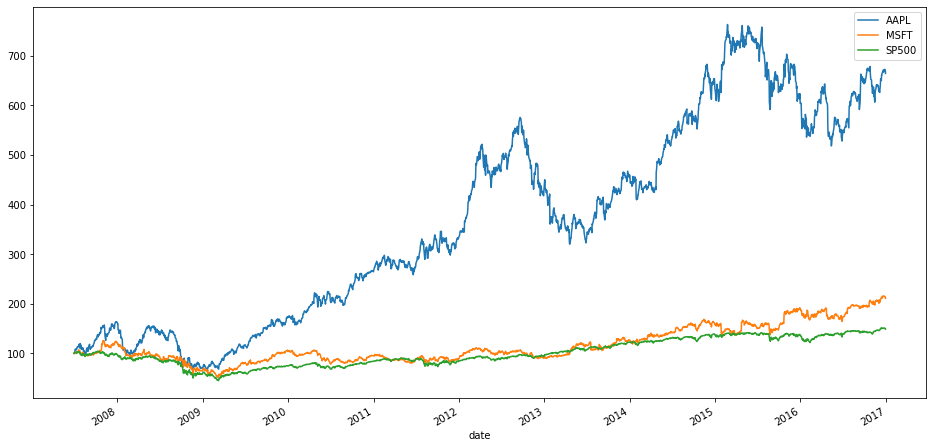

In [59]:
df=pd.concat([msft_aapl, sp500], axis=1).asfreq('B').dropna()
df.div(df.iloc[0]).mul(100).plot()
plt.show()

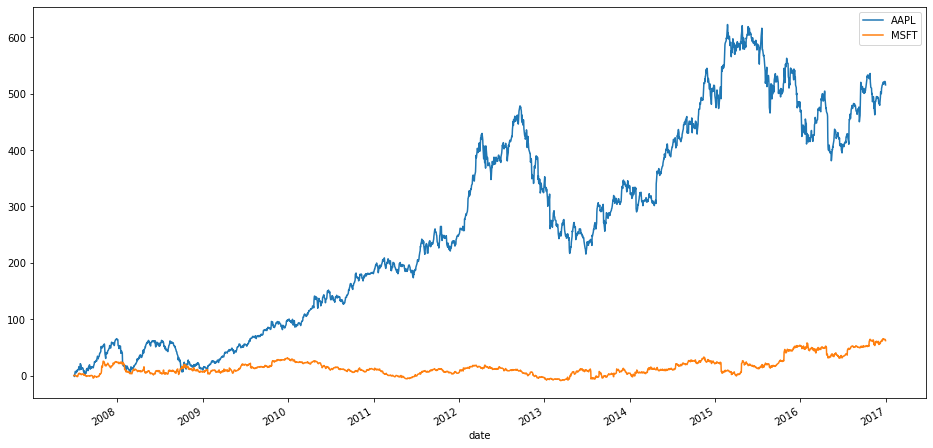

In [60]:
tickers=['AAPL', 'MSFT']
df=df.div(df.iloc[0]).mul(100)
df[tickers].sub(df['SP500'], axis=0).plot()
plt.show()

In [61]:
df.loc['2007']

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976
...,...,...,...
2007-12-24,162.937464,124.126230,99.541025
2007-12-26,163.052209,124.228029,99.621512
2007-12-27,162.765347,122.056328,98.205341


# Changing the time series frequency: resampling

In [62]:
index=pd.date_range(start='2021', periods=4, freq='Q')
data=range(1,5)
quarterly=pd.Series(data=data, index=index)

In [63]:
quarterly

2021-03-31    1
2021-06-30    2
2021-09-30    3
2021-12-31    4
Freq: Q-DEC, dtype: int64

#### Upsampling: Quarterly > Monthly

In [64]:
monthly=quarterly.asfreq('M')
monthly

2021-03-31    1.0
2021-04-30    NaN
2021-05-31    NaN
2021-06-30    2.0
2021-07-31    NaN
2021-08-31    NaN
2021-09-30    3.0
2021-10-31    NaN
2021-11-30    NaN
2021-12-31    4.0
Freq: M, dtype: float64

Upsampling creates missing values.

In [65]:
monthly=monthly.to_frame('baseline')

In [66]:
monthly

,baseline
2021-03-31,1.0
2021-04-30,NaN
2021-05-31,NaN
2021-06-30,2.0
2021-07-31,NaN
2021-08-31,NaN
2021-09-30,3.0
2021-10-31,NaN
2021-11-30,NaN
2021-12-31,4.0


#### Unsampling methods: forward fill, backward fill, 0's fill

In [67]:
monthly['ffill']=quarterly.asfreq('M', method='ffill')
monthly['bfill']=quarterly.asfreq('M', method='bfill')
monthly['value']=quarterly.asfreq('M', fill_value=0)

In [68]:
monthly

,baseline,ffill,bfill,value
2021-03-31,1.0,1,1,1
2021-04-30,NaN,1,2,0
2021-05-31,NaN,1,2,0
2021-06-30,2.0,2,2,2
2021-07-31,NaN,2,3,0
2021-08-31,NaN,2,3,0
2021-09-30,3.0,3,3,3
2021-10-31,NaN,3,4,0
2021-11-30,NaN,3,4,0
2021-12-31,4.0,4,4,4


#### Add missing months: reindex()

In [69]:
dates=pd.date_range(start='2021', periods=12, freq='M')
quarterly.reindex(dates, method='bfill')

2021-01-31    1
2021-02-28    1
2021-03-31    1
2021-04-30    2
2021-05-31    2
2021-06-30    2
2021-07-31    3
2021-08-31    3
2021-09-30    3
2021-10-31    4
2021-11-30    4
2021-12-31    4
Freq: M, dtype: int64

# Create weekly from monthly unemployment data

In [70]:
data=pd.read_csv('unrate_2000.csv', parse_dates=['date'], index_col='date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [71]:
data.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [72]:
# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill'))

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
...            ...
2017-04-02     4.3
2017-04-09     4.3
2017-04-16     4.3
2017-04-23     4.3
2017-04-30     4.3

[905 rows x 1 columns]


In [73]:
# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


####  Plot weekly_fill starting 2015  

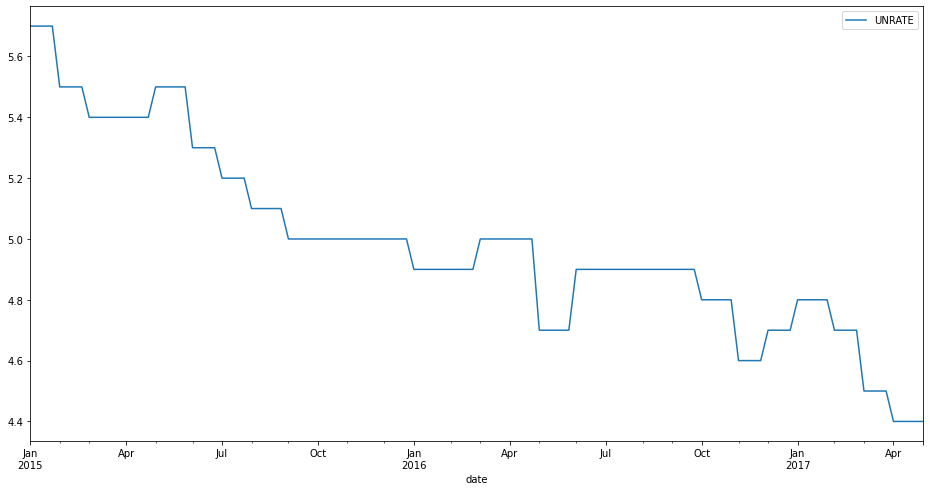

In [74]:
weekly_ffill.loc['2015':].plot()
plt.show();

# Resample method

Timestamp day info can be acquired by day_name() method.

In [75]:
pd.Timestamp('2017-04-28').day_name()

'Friday'

In [76]:
data.resample('M').asfreq()

,UNRATE
date,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-30,NaN
2000-05-31,NaN
...,...
2017-01-31,NaN
2017-02-28,NaN
2017-03-31,NaN


## GDP Growth

In [77]:
gdp=pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [78]:
gdp.head()

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


In [79]:
gdp_1=gdp.resample('MS').ffill().add_suffix('_fill')
print(len(gdp_1))
gdp_1.head()

121


,gdp_growth_fill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1


In [80]:
gdp_2=gdp.resample('MS').interpolate().add_suffix('_inter')
print(len(gdp_2))
gdp_2.head()

121


,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667


In [81]:
pd.concat([gdp, gdp_1, gdp_2], axis=1)

,gdp_growth,gdp_growth_fill,gdp_growth_inter
date,,,
2007-01-01,0.2,0.2,0.200000
2007-02-01,NaN,0.2,1.166667
2007-03-01,NaN,0.2,2.133333
2007-04-01,3.1,3.1,3.100000
2007-05-01,NaN,3.1,2.966667
...,...,...,...
2016-09-01,NaN,3.5,2.566667
2016-10-01,2.1,2.1,2.100000
2016-11-01,NaN,2.1,1.866667


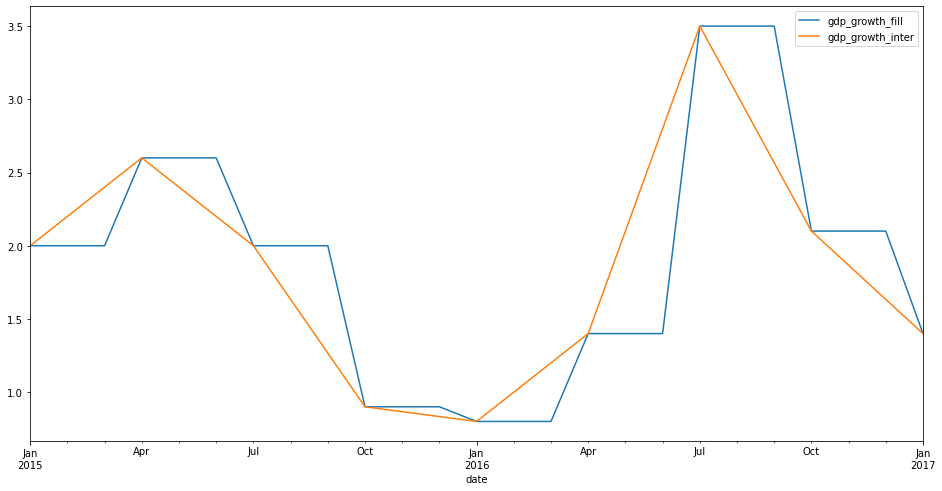

In [82]:
pd.concat([gdp_1, gdp_2], axis=1).loc['2015':].plot()
plt.show()

## Unemployment and GDP

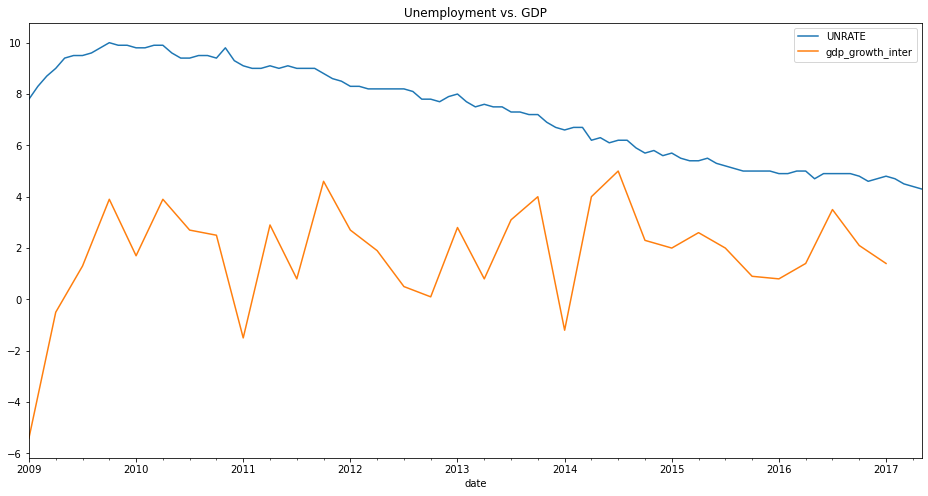

In [83]:
pd.concat([data, gdp_2], axis=1).loc['2009':].plot(title="Unemployment vs. GDP")
plt.show()

# Window Functions In Pandas

#### Rolling average air quality since 2010 for new york city

In [84]:
data=pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col=['date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


In [85]:
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [86]:
data.dropna(inplace=True)

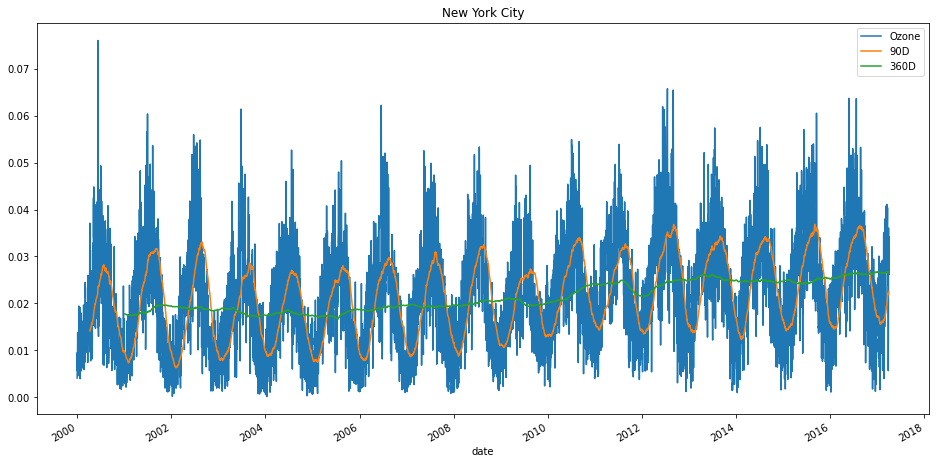

In [87]:
# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling(90).mean()
data['360D'] = data.Ozone.rolling(360).mean()

# Plot data
data.plot(title='New York City')
plt.show();

#### Rolling 360-day median & std. deviation for nyc ozone data since 2000

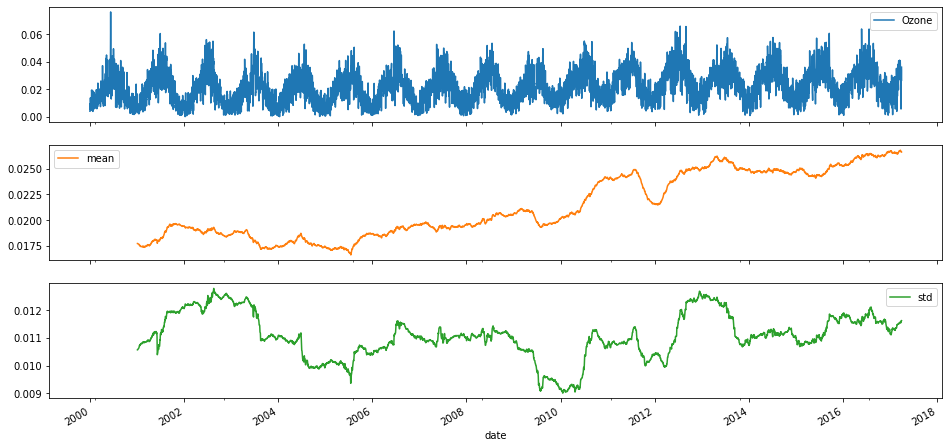

In [88]:
# Import and inspect ozone data here
data = data=pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()


# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show();

#### Rolling quantiles for daily air quality in nyc

In [89]:
data=data.resample('D').interpolate()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


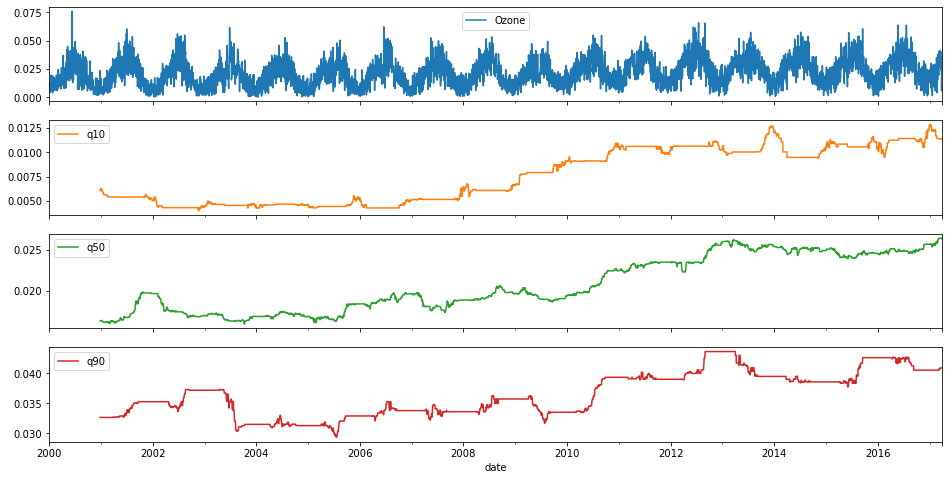

In [90]:
# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot(subplots=True)
plt.show()

The rolling quantiles help show the volatility of the series.

# Expanding Window Function with pandas

In [93]:
df=pd.DataFrame({'data':range(6)})
df['expanding sum']=df.data.expanding().sum()
df['cumulative sum']=df.data.cumsum()

In [94]:
df

,data,expanding sum,cumulative sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10
5,5,15.0,15


#### Cumulative sum vs .diff()

In [99]:
google=google.dropna()

In [100]:
# Calculate differences
differences = google.diff().dropna()

# Select start price
start_price = google.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(google.equals(cumulative_sum))


True


The .cumsum() method allows you to reconstruct the original data from the differences.

#### Cumulative return on 1,000 (in dollars) invested in google vs apple I
let's compare how much $1,000 would be worth if invested in Google various stocks in 2010.

In [107]:
df=pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')
df.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


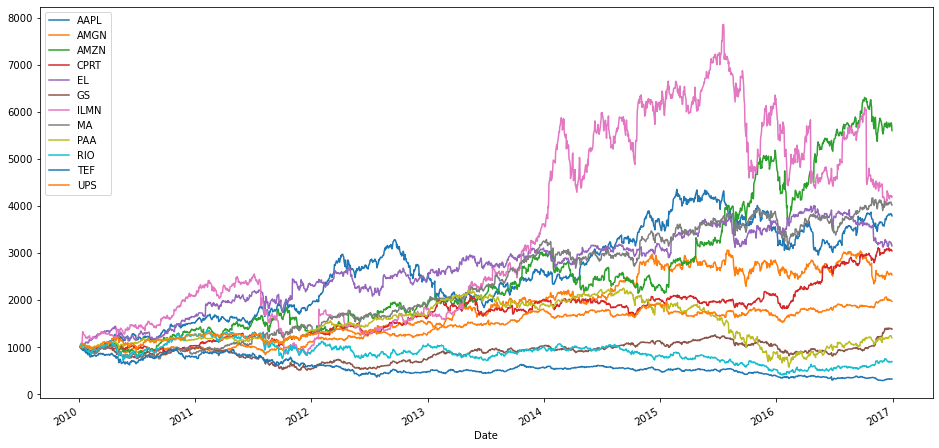

In [127]:
investment=1000
returns=df.pct_change()
returns_plus_one=returns+1
cumulative_return=returns_plus_one.cumprod()
cumulative_return.mul(investment).plot()
plt.show();

#### APPLE vs GOOGLE

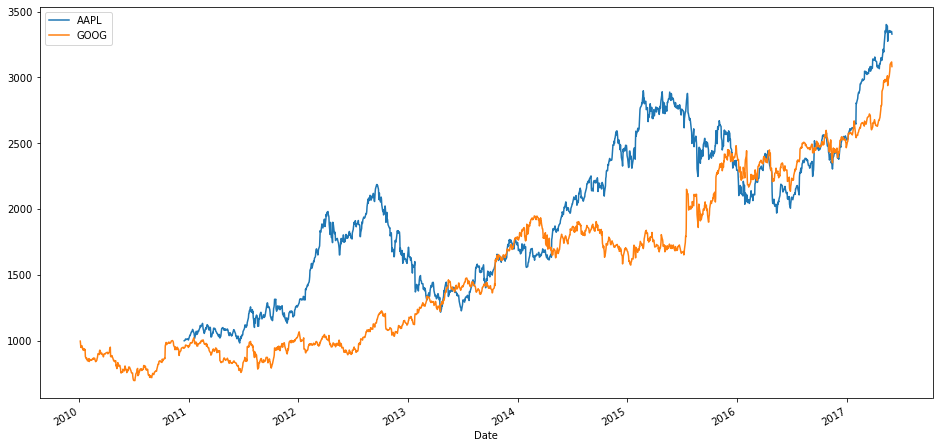

In [131]:
data=pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
returns=data.pct_change()
returns_plus_one=returns+1
cumulative_returns=returns_plus_one.cumprod()
cumulative_returns.mul(investment).plot()
plt.show();

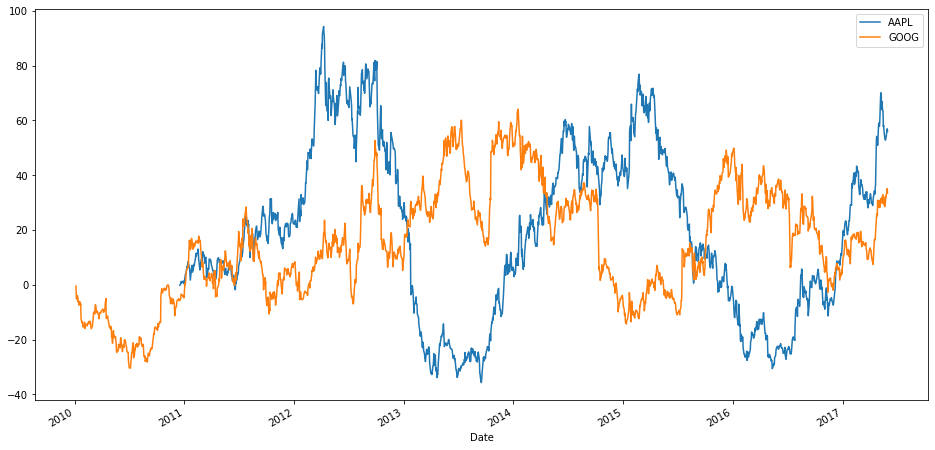

In [132]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()

# S&P 500 Simulation

#### Random Walk Example 

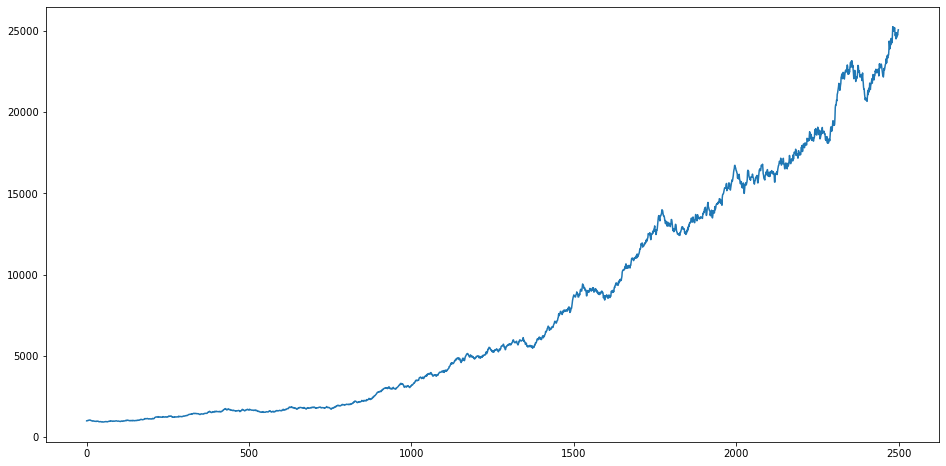

In [182]:
from numpy.random import seed, normal
# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show();

# Annual return correlations among several stocks

In [185]:
data=pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')
data.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


In [186]:
# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

In [187]:
annual_prices

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-12-31,46.08,54.90,180.00,4.67,40.35,168.16,63.34,22.41,31.40,71.66,22.81,72.58
2011-12-31,57.86,64.21,173.10,5.99,56.16,90.43,30.48,37.28,36.72,48.92,17.19,73.19
2012-12-31,76.02,86.20,250.87,7.38,59.86,127.56,55.59,49.13,45.24,58.09,13.49,73.73
2013-12-31,80.15,114.08,398.79,9.16,75.32,177.26,110.59,83.55,51.77,56.43,16.34,105.08
2014-12-31,110.38,159.29,310.35,9.12,76.20,193.83,184.58,86.16,51.32,46.06,14.21,111.17
2015-12-31,105.26,162.33,675.89,9.50,88.06,180.23,191.94,97.36,23.10,29.12,11.06,96.23
2016-12-31,115.82,146.21,749.87,13.85,76.49,239.45,128.04,103.25,32.29,38.46,9.20,114.64


In [188]:
annual_returns

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,0.255642,0.169581,-0.038333,0.282655,0.391822,-0.462238,-0.518787,0.663543,0.169427,-0.317332,-0.246383,0.008405
2012-12-31,0.313861,0.342470,0.449278,0.232053,0.065883,0.410594,0.823819,0.317865,0.232026,0.187449,-0.215241,0.007378
2013-12-31,0.054328,0.323434,0.589628,0.241192,0.258269,0.389621,0.989387,0.700590,0.144341,-0.028576,0.211268,0.425200
2014-12-31,0.377168,0.396301,-0.221771,-0.004367,0.011683,0.093479,0.669048,0.031239,-0.008692,-0.183767,-0.130355,0.057956
2015-12-31,-0.046385,0.019085,1.177831,0.041667,0.155643,-0.070165,0.039874,0.129991,-0.549883,-0.367781,-0.221675,-0.134389
2016-12-31,0.100323,-0.099304,0.109456,0.457895,-0.131388,0.328580,-0.332917,0.060497,0.397835,0.320742,-0.168174,0.191312


In [189]:
# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.639423 -0.782640 -0.139609 -0.087176 -0.064160  0.196741   
AMGN  0.639423  1.000000 -0.267567 -0.484273  0.265609  0.174887  0.780599   
AMZN -0.782640 -0.267567  1.000000 -0.221807  0.157860  0.147352  0.161325   
CPRT -0.139609 -0.484273 -0.221807  1.000000 -0.141719  0.215925 -0.407780   
EL   -0.087176  0.265609  0.157860 -0.141719  1.000000 -0.612696 -0.076387   
GS   -0.064160  0.174887  0.147352  0.215925 -0.612696  1.000000  0.668701   
ILMN  0.196741  0.780599  0.161325 -0.407780 -0.076387  0.668701  1.000000   
MA   -0.062480  0.307340  0.036423  0.262015  0.848515 -0.213024  0.090952   
PAA   0.437532  0.084473 -0.662189  0.777572 -0.220852  0.354054 -0.020424   
RIO   0.107493 -0.130477 -0.204586  0.686494 -0.670398  0.789932  0.175800   
TEF  -0.278297  0.361544  0.119589  0.043987  0.166489  0.496342  0.612399   
UPS  -0.143425  0.188402 -0.178911  0.443566 -0.008023  0.543398

<AxesSubplot:>

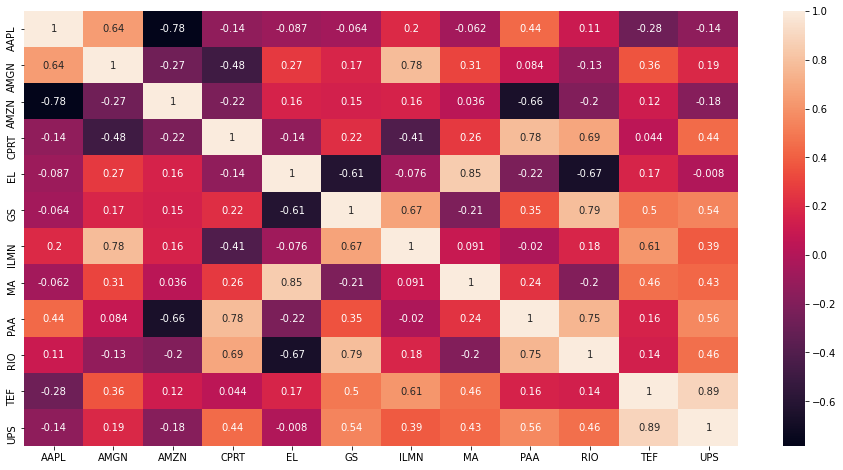

In [191]:
import seaborn as sns
sns.heatmap(correlations, annot=True)

# Market Value Weighted Index

#### Load stock listing data

In [254]:
listings=pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           967 non-null    object 
 1   Last Sale              967 non-null    float64
 2   Market Capitalization  967 non-null    float64
 3   

C:\Users\slomsadze\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [253]:
listings

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
ACU,Acme United Corporation.,27.39,"91,138,992.45","1,988.00",Capital Goods,Industrial Machinery/Components
AAU,"Almaden Minerals, Ltd.",1.72,"154,891,744.80","2,015.00",Basic Industries,Precious Metals
USAS,Americas Silver Corporation,3.05,"120,694,837.90","2,017.00",Basic Industries,Precious Metals
AINC,Ashford Inc.,57.34,"115,550,771.28","2,014.00",Consumer Services,Professional Services
AUXO,"Auxilio, Inc.",6.30,"59,131,036.85","2,017.00",Miscellaneous,Business Services
BPMX,BioPharmX Corporation,0.70,"47,396,931.94","2,015.00",Health Care,Major Pharmaceuticals
BRG,"Bluerock Residential Growth REIT, Inc.",12.57,"303,793,884.33","2,014.00",Consumer Services,Real Estate Investment Trusts
ROX,"Castle Brands, Inc.",1.46,"237,644,443.82","2,006.00",Consumer Non-Durables,Beverages (Production/Distribution)
LEU,Centrus Energy Corp.,5.84,"52,560,000.00","2,014.00",Basic Industries,Mining & Quarrying of Nonmetallic Minerals (No...


Since you'll select the largest company from each sector, remove companies without sector information. 

In [236]:
listings['Market Capitalization']/=1e6 #in Million USD

In [237]:
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
WBAI,500.com Limited,13.96,579.31,"2,013.00",Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,"5,225.24","2,013.00",Technology,"Computer Software: Programming, Data Processing"
ATEN,"A10 Networks, Inc.",8.72,595.98,"2,014.00",Technology,Computer Communications Equipment
AAC,"AAC Holdings, Inc.",8.08,191.42,"2,014.00",Health Care,Medical Specialities
ABBV,AbbVie Inc.,64.13,"102,196.08","2,012.00",Health Care,Major Pharmaceuticals


## Select and inspect index components
Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [238]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

Sector                 Stock Symbol
Miscellaneous          BABA           275,525.00
Technology             ORCL           181,046.10
Health Care            ABBV           102,196.08
Transportation         UPS             90,180.89
Finance                GS              88,840.59
Consumer Non-Durables  ABEV            88,240.20
Basic Industries       RIO             70,431.48
Public Utilities       TEF             54,609.81
Capital Goods          GM              50,086.34
Consumer Services      LVS             44,384.30
Energy                 PAA             22,223.00
Consumer Durables      WRK             12,354.90
Name: Market Capitalization, dtype: float64


In [243]:
listings[listings['Sector']=='Miscellaneous']

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
ACN,Accenture plc,114.86,"73,634.67","2,001.00",Miscellaneous,Business Services
BABA,Alibaba Group Holding Limited,110.21,"275,525.00","2,014.00",Miscellaneous,Business Services
ADS,Alliance Data Systems Corporation,234.91,"13,137.41","2,001.00",Miscellaneous,Business Services
ATKR,Atkore International Group Inc.,25.08,"1,583.09","2,016.00",Miscellaneous,Industrial Machinery/Components
BFAM,Bright Horizons Family Solutions Inc.,71.53,"4,256.88","2,013.00",Miscellaneous,Other Consumer Services
CNDT,Conduent Incorporated,15.78,"3,213.28","2,016.00",Miscellaneous,Business Services
COTV,"Cotiviti Holdings, Inc.",41.07,"3,732.06","2,016.00",Miscellaneous,Business Services
DHX,"DHI Group, Inc.",4.10,206.65,"2,007.00",Miscellaneous,Business Services
DLB,Dolby Laboratories,50.95,"5,193.88","2,005.00",Miscellaneous,Multi-Sector Companies


In [251]:
# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
BABA               Alibaba Group Holding Limited             275,525.00   
ORCL                          Oracle Corporation             181,046.10   
ABBV                                 AbbVie Inc.             102,196.08   
UPS                  United Parcel Service, Inc.              90,180.89   
GS               Goldman Sachs Group, Inc. (The)              88,840.59   
ABEV                                  Ambev S.A.              88,240.20   
RIO                                Rio Tinto Plc              70,431.48   
TEF                                Telefonica SA              54,609.81   
GM                        General Motors Company              50,086.34   
LVS                        Las 